<a href="https://colab.research.google.com/github/asadstat/Data_analysis/blob/master/family_violence_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [323]:
install.packages("bimba")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages/src/contrib:
  Line starting '<html> ...' is malformed!”
Warning message:
“package ‘bimba’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [320]:
# load the library
library(randomForest)
library(caret)
require(caTools)
library(e1071)
library(raster)
library(class)
library(pROC)
library(smotefamily)
library(mlbench)
library(caret)
library(ROSE)

In [ ]:
set.seed(1234)
data <- read.csv("/content/fd.csv",header=T)
data <- data[-1]
#preproc2 <- preProcess(data[,c(1:15)], method=c("range"))
#n.data <- predict(preproc2, data[,c(1:15)])
#n.data$Family_Violence <- data$Family_Violence
head(data)
attach(data)

In [316]:
split = sample.split(Family_Violence, SplitRatio=0.80)
train = subset(data, split==TRUE)
test = subset(data,split==FALSE)
ctrl <- trainControl(method = "repeatedcv", number = 10, repeats =10,sampling="up")

In [321]:
df <- ADASYN(data, perc_min = 50, perc_over = NULL, k = 5, classes = NULL)

ERROR: ignored

In [317]:
fit.glm <-train(Family_Violence~., data=train, method="glm", trControl=ctrl,preProcess = c("range"))
pred3 <- predict(fit.glm,test)
h3 <- data.frame(pred3 ,test=test$Family_Violence)
t3 <- table(h3)
confusionMatrix(t3,positive='Yes')

Confusion Matrix and Statistics

     test
pred3 No Yes
  No  30  13
  Yes 26  33
                                          
               Accuracy : 0.6176          
                 95% CI : (0.5161, 0.7121)
    No Information Rate : 0.549           
    P-Value [Acc > NIR] : 0.09742         
                                          
                  Kappa : 0.2469          
                                          
 Mcnemar's Test P-Value : 0.05466         
                                          
            Sensitivity : 0.7174          
            Specificity : 0.5357          
         Pos Pred Value : 0.5593          
         Neg Pred Value : 0.6977          
             Prevalence : 0.4510          
         Detection Rate : 0.3235          
   Detection Prevalence : 0.5784          
      Balanced Accuracy : 0.6266          
                                          
       'Positive' Class : Yes             
                                          

In [149]:
table(train$Family_Violence)


 No Yes 
226 183 

In [318]:
fit.rf <- train(Family_Violence~., data=train, method="rf", trControl=ctrl,preProcess = c("range"))
pred1 <- predict(fit.rf,test)
h1 <- data.frame(pred1 ,test=test$Family_Violence)
t1 <- table(h1)
confusionMatrix(t1,positive='Yes')

Confusion Matrix and Statistics

     test
pred1 No Yes
  No  33  19
  Yes 23  27
                                          
               Accuracy : 0.5882          
                 95% CI : (0.4864, 0.6848)
    No Information Rate : 0.549           
    P-Value [Acc > NIR] : 0.2437          
                                          
                  Kappa : 0.1749          
                                          
 Mcnemar's Test P-Value : 0.6434          
                                          
            Sensitivity : 0.5870          
            Specificity : 0.5893          
         Pos Pred Value : 0.5400          
         Neg Pred Value : 0.6346          
             Prevalence : 0.4510          
         Detection Rate : 0.2647          
   Detection Prevalence : 0.4902          
      Balanced Accuracy : 0.5881          
                                          
       'Positive' Class : Yes             
                                          


common   rare 
   100     50 

Confusion Matrix and Statistics

     test
pred3 No Yes
  No  24   9
  Yes 32  37
                                          
               Accuracy : 0.598           
                 95% CI : (0.4963, 0.6939)
    No Information Rate : 0.549           
    P-Value [Acc > NIR] : 0.1854883       
                                          
                  Kappa : 0.223           
                                          
 Mcnemar's Test P-Value : 0.0005908       
                                          
            Sensitivity : 0.8043          
            Specificity : 0.4286          
         Pos Pred Value : 0.5362          
         Neg Pred Value : 0.7273          
             Prevalence : 0.4510          
         Detection Rate : 0.3627          
   Detection Prevalence : 0.6765          
      Balanced Accuracy : 0.6165          
                                          
       'Positive' Class : Yes             
                                          

ERROR: ignored

Confusion Matrix and Statistics

     test
pred1 No Yes
  No  21   7
  Yes 35  39
                                          
               Accuracy : 0.5882          
                 95% CI : (0.4864, 0.6848)
    No Information Rate : 0.549           
    P-Value [Acc > NIR] : 0.2437          
                                          
                  Kappa : 0.2113          
                                          
 Mcnemar's Test P-Value : 3.097e-05       
                                          
            Sensitivity : 0.8478          
            Specificity : 0.3750          
         Pos Pred Value : 0.5270          
         Neg Pred Value : 0.7500          
             Prevalence : 0.4510          
         Detection Rate : 0.3824          
   Detection Prevalence : 0.7255          
      Balanced Accuracy : 0.6114          
                                          
       'Positive' Class : Yes             
                                          

Setting levels: control = No, case = Yes

Setting direction: controls < cases



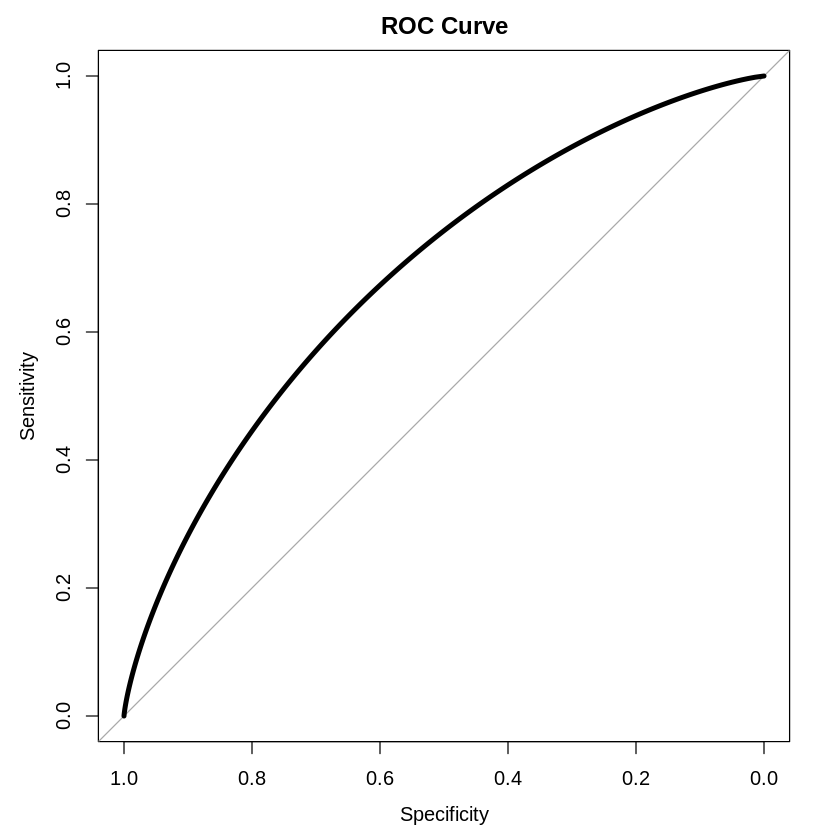

In [ ]:
fit.nb <- train(family.violence~., data=train, method="nb", trControl=ctrl,preProcess = c("scale", "center"))
pred6 <- predict(fit.nb,test)
h6 <- data.frame(pred6 ,test=test$family.violence)
t6 <- table(h6)
confusionMatrix(t6,positive='Yes')
pred66 <- predict(fit.nb, test,type="prob")
ROC_nb <- roc(test$family.violence, pred66[,2],smooth=T)
plot(ROC_nb, col = 30,lwd=4,lty=1,add=T)

In [ ]:
legend("bottomright",legend=c("RF","LR","NB"),col=c(25,26,30),lwd=c(4,4,4),lty=c(1,1,1),cex=0.8,title="ALGORITHM", text.font=4, bg='lightblue')